In [1]:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import missingno as msno
import plotly.express as px

import folium 
from folium.plugins import HeatMap

import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/airline-dataset/Airline Dataset Updated.csv
/kaggle/input/airline-dataset/Airline Dataset Updated - v2.csv
/kaggle/input/airline-dataset/Airline Dataset.csv


## Importing Dataset 

In [2]:
df = pd.read_csv('/kaggle/input/airline-dataset/Airline Dataset Updated - v2.csv')

In [3]:
df.head(10)

,Passenger ID,First Name,Last Name,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status
0,ABVWIg,Edithe,Leggis,Female,62,Japan,Coldfoot Airport,US,United States,NAM,North America,6/28/2022,CXF,Fransisco Hazeldine,On Time
1,jkXXAX,Elwood,Catt,Male,62,Nicaragua,Kugluktuk Airport,CA,Canada,NAM,North America,12/26/2022,YCO,Marla Parsonage,On Time
2,CdUz2g,Darby,Felgate,Male,67,Russia,Grenoble-Isère Airport,FR,France,EU,Europe,1/18/2022,GNB,Rhonda Amber,On Time
3,BRS38V,Dominica,Pyle,Female,71,China,Ottawa / Gatineau Airport,CA,Canada,NAM,North America,9/16/2022,YND,Kacie Commucci,Delayed
4,9kvTLo,Bay,Pencost,Male,21,China,Gillespie Field,US,United States,NAM,North America,2/25/2022,SEE,Ebonee Tree,On Time
5,nMJKVh,Lora,Durbann,Female,55,Brazil,Coronel Horácio de Mattos Airport,BR,Brazil,SAM,South America,06-10-2022,LEC,Inglis Dolley,On Time
6,8IPFPE,Rand,Bram,Male,73,Ivory Coast,Duxford Aerodrome,GB,United Kingdom,EU,Europe,10/30/2022,QFO,Stanislas Tiffin,Cancelled
7,pqixbY,Perceval,Dallosso,Male,36,Vietnam,Maestro Wilson Fonseca Airport,BR,Brazil,SAM,South America,04-07-2022,STM,Sharyl Eastmead,Cancelled
8,QNAs2R,Aleda,Pigram,Female,35,Palestinian Territory,Venice Marco Polo Airport,IT,Italy,EU,Europe,8/20/2022,VCE,Daryn Bardsley,On Time
9,3jmudz,Burlie,Schustl,Male,13,Thailand,Vermilion Airport,CA,Canada,NAM,North America,04-06-2022,YVG,Alameda Carlyle,On Time


In [4]:
df.shape

(98619, 15)

We have 98619 entries with 15 columns

In [5]:
#Checking the datatypes 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98619 entries, 0 to 98618
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Passenger ID          98619 non-null  object
 1   First Name            98619 non-null  object
 2   Last Name             98619 non-null  object
 3   Gender                98619 non-null  object
 4   Age                   98619 non-null  int64 
 5   Nationality           98619 non-null  object
 6   Airport Name          98619 non-null  object
 7   Airport Country Code  98619 non-null  object
 8   Country Name          98619 non-null  object
 9   Airport Continent     98619 non-null  object
 10  Continents            98619 non-null  object
 11  Departure Date        98619 non-null  object
 12  Arrival Airport       98619 non-null  object
 13  Pilot Name            98619 non-null  object
 14  Flight Status         98619 non-null  object
dtypes: int64(1), object(14)
memory usage

In [6]:
#checking the null values for confirmation

df.isnull().sum()

Passenger ID            0
First Name              0
Last Name               0
Gender                  0
Age                     0
Nationality             0
Airport Name            0
Airport Country Code    0
Country Name            0
Airport Continent       0
Continents              0
Departure Date          0
Arrival Airport         0
Pilot Name              0
Flight Status           0
dtype: int64

We don't have any null values in the dataset.

# Exploratory Data Analysis 

In [7]:
#Let's check the dataset again 
df.head(5)

,Passenger ID,First Name,Last Name,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status
0,ABVWIg,Edithe,Leggis,Female,62,Japan,Coldfoot Airport,US,United States,NAM,North America,6/28/2022,CXF,Fransisco Hazeldine,On Time
1,jkXXAX,Elwood,Catt,Male,62,Nicaragua,Kugluktuk Airport,CA,Canada,NAM,North America,12/26/2022,YCO,Marla Parsonage,On Time
2,CdUz2g,Darby,Felgate,Male,67,Russia,Grenoble-Isère Airport,FR,France,EU,Europe,1/18/2022,GNB,Rhonda Amber,On Time
3,BRS38V,Dominica,Pyle,Female,71,China,Ottawa / Gatineau Airport,CA,Canada,NAM,North America,9/16/2022,YND,Kacie Commucci,Delayed
4,9kvTLo,Bay,Pencost,Male,21,China,Gillespie Field,US,United States,NAM,North America,2/25/2022,SEE,Ebonee Tree,On Time


Here **First Name, Last Name** and **Passenger ID** columns doesn't hold much significance so we can drop them. 

In [8]:
df = df.drop(['First Name', 'Last Name', 'Passenger ID'], axis = 1)

In [9]:
df.head(5)

,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status
0,Female,62,Japan,Coldfoot Airport,US,United States,NAM,North America,6/28/2022,CXF,Fransisco Hazeldine,On Time
1,Male,62,Nicaragua,Kugluktuk Airport,CA,Canada,NAM,North America,12/26/2022,YCO,Marla Parsonage,On Time
2,Male,67,Russia,Grenoble-Isère Airport,FR,France,EU,Europe,1/18/2022,GNB,Rhonda Amber,On Time
3,Female,71,China,Ottawa / Gatineau Airport,CA,Canada,NAM,North America,9/16/2022,YND,Kacie Commucci,Delayed
4,Male,21,China,Gillespie Field,US,United States,NAM,North America,2/25/2022,SEE,Ebonee Tree,On Time


### Gender Column

In [10]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [11]:
data = df['Gender'].value_counts().reset_index()

In [12]:
data

,Gender,count
0,Male,49598
1,Female,49021


We have total no. of Males =  49598 &
        total no. of Females =  49021

In [13]:
#visualization

fig=px.bar(data,x='Gender',y='count',color='Gender',color_discrete_sequence=px.colors.sequential.Agsunset,template = 'plotly_dark')

fig.update_layout(title_text='Number of Males & Females', xaxis_title='GENDER', yaxis_title='COUNT')

fig.show()


Number of males and females in the dataset are comparable.

### Age 

<Axes: xlabel='Age', ylabel='Density'>

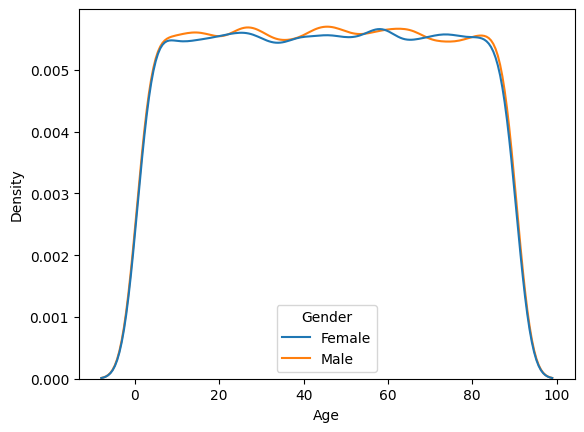

In [23]:
from seaborn import kdeplot
kdeplot(data=df, x='Age', hue='Gender')

A Kernel Density Estimate (KDE) plot is a statistical tool used to visualize the probability density of a continuous variable.

### Nationality

In [14]:
df['Nationality'].unique()

array(['Japan', 'Nicaragua', 'Russia', 'China', 'Brazil', 'Ivory Coast',
       'Vietnam', 'Palestinian Territory', 'Thailand', 'Tunisia',
       'Sweden', 'Colombia', 'Greece', 'Philippines', 'Ukraine',
       'Indonesia', 'Croatia', 'Democratic Republic of the Congo',
       'France', 'Peru', 'Latvia', 'Germany', 'Czech Republic', 'Ireland',
       'Iran', 'Madagascar', 'United States', 'Ghana', 'Mali',
       'Guatemala', 'Kyrgyzstan', 'Haiti', 'Afghanistan', 'Ethiopia',
       'Tanzania', 'Nigeria', 'Cameroon', 'Morocco', 'Armenia', 'Mexico',
       'Chile', 'Albania', 'Luxembourg', 'Honduras', 'Portugal',
       'Kazakhstan', 'Pakistan', 'Poland', 'South Africa', 'Kenya',
       'Serbia', 'Maldives', 'Argentina', 'Uruguay', 'Netherlands',
       'Botswana', 'Egypt', 'Syria', 'Myanmar', 'Slovenia', 'Spain',
       'Macedonia', 'Mongolia', 'Yemen', 'Benin', 'Laos', 'Norway',
       'Sao Tome and Principe', 'Venezuela', 'United Kingdom', 'Denmark',
       'Dominican Republic', 'North

In [15]:
df['Nationality'].nunique()

240

Here are 240 different Nationalities 

In [16]:
nation_count=df['Nationality'].value_counts().reset_index()

In [17]:
nation_count

,Nationality,count
0,China,18317
1,Indonesia,10559
2,Russia,5693
3,Philippines,5239
4,Brazil,3791
...,...,...
235,Romania,2
236,British Virgin Islands,2
237,Jersey,1
238,Norfolk Island,1


In [19]:
# Getting the top 10 Nationalities 
top_10_countries=nation_count.nlargest(10,'count')
top_10_countries.reset_index()
top_10_countries

,Nationality,count
0,China,18317
1,Indonesia,10559
2,Russia,5693
3,Philippines,5239
4,Brazil,3791
5,Portugal,3299
6,Poland,3245
7,France,2907
8,Sweden,2397
9,United States,2105


In [20]:
# Let's visualise top 10 Nationalities 
px.bar(top_10_countries, x='Nationality', y = 'count',color='Nationality',color_discrete_sequence=px.colors.sequential.Agsunset  ,template = 'plotly_dark')

In [21]:
#Lowest top 10 Nationalities 

lowest_10_countries=nation_count.nsmallest(10,'count')
lowest_10_countries.reset_index()
lowest_10_countries

,Nationality,count
237,Jersey,1
238,Norfolk Island,1
239,Sint Maarten,1
228,French Southern Territories,2
229,Svalbard and Jan Mayen,2
230,Saint Helena,2
231,Macao,2
232,Saint Martin,2
233,Cook Islands,2
234,Cocos Islands,2


In [22]:
# Let's visualise Lowest number of Passanger Nationalities
px.bar(lowest_10_countries,x='Nationality',y='count',color='Nationality',color_discrete_sequence=px.colors.sequential.Agsunset  ,template = 'plotly_dark')

### Airport Name (Boarding Airport)

In [24]:
df['Airport Name'].unique()

array(['Coldfoot Airport', 'Kugluktuk Airport', 'Grenoble-Isère Airport',
       ..., 'Camaxilo Airport', 'Babelthuap Airport',
       'Westchester County Airport'], dtype=object)

In [25]:
df['Airport Name'].nunique()

9062

There are 9062 unique airport entries from where the passengers took the flight.

In [26]:
airport_name=df['Airport Name'].value_counts().reset_index()
airport_name

,Airport Name,count
0,San Pedro Airport,43
1,Santa Maria Airport,38
2,Böblingen Flugfeld,36
3,Santa Ana Airport,35
4,San Fernando Airport,31
...,...,...
9057,Balıkesir Merkez Airport,2
9058,Arkalyk North Airport,2
9059,Juba International Airport,2
9060,Falcon State Airport,1


In [28]:
# Getting the top 10 airports with the highest number of passengers

top10_airport = airport_name.nlargest(10,'count')
top10_airport

,Airport Name,count
0,San Pedro Airport,43
1,Santa Maria Airport,38
2,Böblingen Flugfeld,36
3,Santa Ana Airport,35
4,San Fernando Airport,31
5,Mae Hong Son Airport,29
6,Capital City Airport,28
7,Cochrane Airport,28
8,Santa Rosa Airport,28
9,Bathurst Airport,27


In [31]:
#Let's plot top 10 airport

px.bar(top10_airport,x='count',y='Airport Name',color='Airport Name',color_discrete_sequence=px.colors.sequential.Agsunset  ,template = 'plotly_dark')

In [34]:
# Getting the top 10 airports with the lowest number of passengers

bottom10_airport = airport_name.nsmallest(10, 'count')
bottom10_airport

,Airport Name,count
9060,Falcon State Airport,1
9061,Hiroshima Airport,1
9051,Camaxilo Airport,2
9052,Mount Gambier Airport,2
9053,J F Mitchell Airport,2
9054,Kar Kar Airport,2
9055,Smolensk North Airport,2
9056,San Luis Airport,2
9057,Balıkesir Merkez Airport,2
9058,Arkalyk North Airport,2


In [35]:
#Let's plot

px.bar(bottom10_airport,x='count',y='Airport Name',color='Airport Name',color_discrete_sequence=px.colors.sequential.Agsunset  ,template = 'plotly_dark')

## Countries

In [38]:
df['Country Name'].unique()

array(['United States', 'Canada', 'France', 'Brazil', 'United Kingdom',
       'Italy', 'Mexico', 'Panama', 'Pakistan', 'Australia',
       'South Africa', 'Venezuela, Bolivarian Republic of', 'China',
       'Madagascar', 'Colombia', 'Mauritania', 'Myanmar', 'Congo',
       'Zambia', 'Samoa', 'New Caledonia', 'Equatorial Guinea',
       'Papua New Guinea', 'Bahamas', 'Indonesia', 'Russian Federation',
       'Bolivia, Plurinational State of', 'Kenya', 'Burkina Faso',
       'Guatemala', 'Taiwan, Province of China', 'India', 'Norway',
       'Costa Rica', 'Portugal', 'Sri Lanka', 'French Polynesia',
       'Mozambique', 'Algeria', 'Nepal', 'Bulgaria',
       'Iran, Islamic Republic of', 'Honduras', 'Sudan', 'Japan',
       'Dominican Republic', 'Iceland', 'Viet Nam',
       'Syrian Arab Republic', 'Romania', 'Cayman Islands', 'Germany',
       'Slovakia', 'Botswana', 'Saudi Arabia', 'Ecuador', 'Cameroon',
       'Mongolia', 'Dominica', 'Paraguay', 'Israel', 'Croatia',
       'Argentina

In [39]:
df['Country Name'].nunique()

235

In [40]:
country=df['Country Name'].value_counts().reset_index()
country

,Country Name,count
0,United States,22104
1,Australia,6370
2,Canada,5424
3,Brazil,4504
4,Papua New Guinea,4081
...,...,...
230,Andorra,7
231,Monaco,7
232,Nauru,7
233,Palau,5


In [41]:
# Top 10 countries 

top10_country=country.nlargest(10,'count')
top10_country

,Country Name,count
0,United States,22104
1,Australia,6370
2,Canada,5424
3,Brazil,4504
4,Papua New Guinea,4081
5,China,2779
6,Indonesia,2358
7,Russian Federation,2247
8,Colombia,1643
9,India,1486


In [43]:
#Let's plot this

px.bar(top10_country,x='count',y='Country Name',color='Country Name',color_discrete_sequence=px.colors.sequential.Agsunset  ,template = 'plotly_dark')

## Continents

In [44]:
continent=df['Continents'].value_counts().reset_index()
continent

,Continents,count
0,North America,32033
1,Asia,18637
2,Oceania,13866
3,Europe,12335
4,Africa,11030
5,South America,10718


In [48]:
# Plotting the continents passenger count
px.bar(continent,x='count',y='Continents',color='Continents',color_discrete_sequence=px.colors.sequential.Agsunset  ,template = 'plotly_dark')

Let's look at the dataset again

In [49]:
df.head(10)

,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status
0,Female,62,Japan,Coldfoot Airport,US,United States,NAM,North America,6/28/2022,CXF,Fransisco Hazeldine,On Time
1,Male,62,Nicaragua,Kugluktuk Airport,CA,Canada,NAM,North America,12/26/2022,YCO,Marla Parsonage,On Time
2,Male,67,Russia,Grenoble-Isère Airport,FR,France,EU,Europe,1/18/2022,GNB,Rhonda Amber,On Time
3,Female,71,China,Ottawa / Gatineau Airport,CA,Canada,NAM,North America,9/16/2022,YND,Kacie Commucci,Delayed
4,Male,21,China,Gillespie Field,US,United States,NAM,North America,2/25/2022,SEE,Ebonee Tree,On Time
5,Female,55,Brazil,Coronel Horácio de Mattos Airport,BR,Brazil,SAM,South America,06-10-2022,LEC,Inglis Dolley,On Time
6,Male,73,Ivory Coast,Duxford Aerodrome,GB,United Kingdom,EU,Europe,10/30/2022,QFO,Stanislas Tiffin,Cancelled
7,Male,36,Vietnam,Maestro Wilson Fonseca Airport,BR,Brazil,SAM,South America,04-07-2022,STM,Sharyl Eastmead,Cancelled
8,Female,35,Palestinian Territory,Venice Marco Polo Airport,IT,Italy,EU,Europe,8/20/2022,VCE,Daryn Bardsley,On Time
9,Male,13,Thailand,Vermilion Airport,CA,Canada,NAM,North America,04-06-2022,YVG,Alameda Carlyle,On Time


We can drop the Country Code and Pilot Name too:

In [ ]:
df = df.drop(['Pilot Name', 'Airport Country Code'], axis = 1)

In [53]:
df.head(5)

,Gender,Age,Nationality,Airport Name,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Flight Status
0,Female,62,Japan,Coldfoot Airport,United States,NAM,North America,6/28/2022,CXF,On Time
1,Male,62,Nicaragua,Kugluktuk Airport,Canada,NAM,North America,12/26/2022,YCO,On Time
2,Male,67,Russia,Grenoble-Isère Airport,France,EU,Europe,1/18/2022,GNB,On Time
3,Female,71,China,Ottawa / Gatineau Airport,Canada,NAM,North America,9/16/2022,YND,Delayed
4,Male,21,China,Gillespie Field,United States,NAM,North America,2/25/2022,SEE,On Time


## Airport Name (Arrival Airports)

In [54]:
airport=df['Arrival Airport'].value_counts().reset_index()
airport

,Arrival Airport,count
0,0,873
1,JNB,37
2,PHM,36
3,MPT,32
4,PCO,27
...,...,...
9019,CXM,2
9020,IPI,2
9021,BQU,2
9022,FAL,1


In [55]:
# Top 10 arrival airports
top=airport.nlargest(10,'count')
top

,Arrival Airport,count
0,0,873
1,JNB,37
2,PHM,36
3,MPT,32
4,PCO,27
5,YTY,27
6,ZRZ,26
7,DZI,25
8,AHT,25
9,GTF,25


In [56]:
px.bar(top,x='count',y='Arrival Airport',color='Arrival Airport',color_discrete_sequence=px.colors.sequential.Agsunset  ,template = 'plotly_dark')

## Flight Status

In [57]:
status=df['Flight Status'].value_counts().reset_index()
status

,Flight Status,count
0,Cancelled,32942
1,On Time,32846
2,Delayed,32831


In [59]:
#Visualisation
px.bar(status,x='Flight Status',y='count',color='Flight Status',color_discrete_sequence=px.colors.sequential.Viridis,template = 'plotly_dark')

The numbers are suprisingly identical.

### Continent wise Delay Analysis

#### North America

In [61]:
N_America=df[df['Continents']=='North America']
N_America

,Gender,Age,Nationality,Airport Name,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Flight Status
0,Female,62,Japan,Coldfoot Airport,United States,NAM,North America,6/28/2022,CXF,On Time
1,Male,62,Nicaragua,Kugluktuk Airport,Canada,NAM,North America,12/26/2022,YCO,On Time
3,Female,71,China,Ottawa / Gatineau Airport,Canada,NAM,North America,9/16/2022,YND,Delayed
4,Male,21,China,Gillespie Field,United States,NAM,North America,2/25/2022,SEE,On Time
9,Male,13,Thailand,Vermilion Airport,Canada,NAM,North America,04-06-2022,YVG,On Time
...,...,...,...,...,...,...,...,...,...,...
98597,Female,38,Peru,Fort Chipewyan Airport,Canada,NAM,North America,01-10-2022,YPY,On Time
98604,Female,47,Brazil,St Cloud Regional Airport,United States,NAM,North America,02-08-2022,STC,On Time
98605,Female,7,China,Newport Municipal Airport,United States,NAM,North America,09-07-2022,ONP,On Time
98608,Female,24,Chile,Luis Munoz Marin International Airport,Puerto Rico,NAM,North America,3/23/2022,SJU,Cancelled


In [62]:
status_na=N_America['Flight Status'].value_counts().reset_index()
status_na

,Flight Status,count
0,Delayed,10696
1,Cancelled,10693
2,On Time,10644


#### Asia 

In [63]:
asia=df[df['Continents']=='Asia']
asia

,Gender,Age,Nationality,Airport Name,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Flight Status
12,Female,47,Sweden,Loralai Airport,Pakistan,AS,Asia,3/19/2022,LRG,Delayed
17,Male,12,Greece,Enshi Airport,China,AS,Asia,3/29/2022,ENH,Delayed
19,Male,62,China,Guilin Liangjiang International Airport,China,AS,Asia,09-05-2022,KWL,Cancelled
26,Female,14,Democratic Republic of the Congo,Bagan Airport,Myanmar,AS,Asia,10-03-2022,NYU,Delayed
42,Female,56,China,Rar Gwamar Airport,Indonesia,AS,Asia,07-08-2022,DOB,Delayed
...,...,...,...,...,...,...,...,...,...,...
98603,Male,39,Haiti,Senipah Heliport,Indonesia,AS,Asia,10-08-2022,SZH,On Time
98609,Female,22,China,Wuzhou Changzhoudao Airport,China,AS,Asia,4/23/2022,WUZ,On Time
98610,Male,83,France,Warangal Airport,India,AS,Asia,08-05-2022,WGC,Cancelled
98611,Female,41,Canada,Ipil Airport,Philippines,AS,Asia,06-06-2022,IPE,On Time


In [64]:
status_as=asia['Flight Status'].value_counts().reset_index()
status_as

,Flight Status,count
0,On Time,6242
1,Cancelled,6235
2,Delayed,6160


#### Oceania 

In [65]:
oceania=df[df['Continents']=='Oceania']
oceania

,Gender,Age,Nationality,Airport Name,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Flight Status
13,Female,77,Russia,Cudal Airport,Australia,OC,Oceania,3/24/2022,CUG,Delayed
30,Female,14,China,Faleolo International Airport,Samoa,OC,Oceania,7/22/2022,APW,Delayed
32,Male,19,Germany,Nesson Airport,New Caledonia,OC,Oceania,3/25/2022,HLU,Cancelled
35,Male,9,Sweden,Gora Airstrip,Papua New Guinea,OC,Oceania,6/25/2022,GOC,On Time
37,Male,32,China,Moki Airport,Papua New Guinea,OC,Oceania,12/21/2022,MJJ,Cancelled
...,...,...,...,...,...,...,...,...,...,...
98538,Male,76,Indonesia,Pimaga Airport,Papua New Guinea,OC,Oceania,12/28/2022,PMP,Delayed
98567,Female,5,Finland,Meekatharra Airport,Australia,OC,Oceania,12-09-2022,MKR,Delayed
98580,Male,82,Norway,Kurwina Airport,Papua New Guinea,OC,Oceania,1/29/2022,KWV,Cancelled
98589,Female,29,Brazil,Austral Downs Airport,Australia,OC,Oceania,5/29/2022,AWP,Cancelled


In [66]:
status_oc=asia['Flight Status'].value_counts().reset_index()
status_oc

,Flight Status,count
0,On Time,6242
1,Cancelled,6235
2,Delayed,6160


#### Europe

In [67]:
eu=df[df['Continents']=='Europe']
status_eu=eu['Flight Status'].value_counts().reset_index()
status_eu

,Flight Status,count
0,Delayed,4178
1,Cancelled,4095
2,On Time,4062


#### Africa

In [68]:
af=df[df['Continents']=='Africa']
status_af=af['Flight Status'].value_counts().reset_index()
status_af

,Flight Status,count
0,On Time,3719
1,Cancelled,3657
2,Delayed,3654


#### North America

In [69]:
sa=df[df['Continents']=='South America']
status_sa=sa['Flight Status'].value_counts().reset_index()
status_sa

,Flight Status,count
0,Cancelled,3643
1,On Time,3566
2,Delayed,3509


We observed that:
* Most Cancelled Flights are from North America
* Most delayed are from North america
* Most On Time are from North america